<a href="https://colab.research.google.com/github/golf41101/Suchet/blob/master/handle_imbalacedata_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
from google.colab import drive
#mount you GoogleDrive to "drive" folder
drive.mount('/drive', force_remount=False)

Mounted at /drive


In [5]:
#set path
path ="/drive/MyDrive/Classification/Weather/"

In [6]:
df = pd.read_csv(path + "weatherAUS.csv")

# OverView Data

In [7]:
df.shape

(145460, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Convert type

In [9]:
#convert Date : object type to datetime type

df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
df.sort_values('Date',ascending=True,inplace=True)

In [12]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20.0,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17.0,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6.0,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24.0,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28.0,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64190,2017-06-25,Sale,0.1,14.8,0.0,NaN,NaN,NaN,NaN,WNW,NW,6.0,31.0,72.0,50.0,1016.3,1013.2,NaN,NaN,5.9,14.0,No,No
67199,2017-06-25,MelbourneAirport,5.5,13.9,0.0,2.8,3.8,NNW,44.0,N,NW,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,No
70392,2017-06-25,Melbourne,8.6,14.3,0.0,2.8,3.8,NW,35.0,N,NNW,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,Yes
123830,2017-06-25,Perth,6.3,17.0,0.0,1.6,7.9,E,26.0,SE,SE,4.0,11.0,75.0,49.0,1028.6,1026.0,1.0,3.0,11.5,15.6,No,No


# **Exploration data analysis**

In [13]:
# EDA : Categorical variable
cat = [var for var in df.columns if df[var].dtype=='O']
print('\033[1m {} Categorical variable in this dataset\033[0m\n'.format(len(cat)))

for i in df.columns:
  if df[i].dtype=='O':
    print(i,': Categorical variable')
    display(df[i].value_counts())
    print('---')

 6 Categorical variable in this dataset

Location : Categorical variable


Canberra            3436
Sydney              3344
Adelaide            3193
Hobart              3193
Melbourne           3193
Brisbane            3193
Perth               3193
Darwin              3193
MountGambier        3040
Wollongong          3040
Bendigo             3040
Ballarat            3040
Launceston          3040
GoldCoast           3040
Cairns              3040
Albury              3040
AliceSprings        3040
Townsville          3040
Albany              3040
MountGinini         3040
Tuggeranong         3039
Newcastle           3039
Penrith             3039
Watsonia            3009
Cobar               3009
Witchcliffe         3009
NorfolkIsland       3009
Mildura             3009
Portland            3009
Richmond            3009
WaggaWagga          3009
SydneyAirport       3009
Sale                3009
Nuriootpa           3009
PearceRAAF          3009
Woomera             3009
CoffsHarbour        3009
PerthAirport        3009
MelbourneAirport    3009
Williamtown         3009


---
WindGustDir : Categorical variable


W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

---
WindDir9am : Categorical variable


N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

---
WindDir3pm : Categorical variable


SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

---
RainToday : Categorical variable


No     110319
Yes     31880
Name: RainToday, dtype: int64

---
RainTomorrow : Categorical variable


No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

---


### Check null by calculate null ratio

In [14]:
# Check null ratio of this data
(df.isnull().sum()/df.shape[0]).round(2).sort_values(ascending=False)

Sunshine         0.48
Evaporation      0.43
Cloud3pm         0.41
Cloud9am         0.38
Pressure3pm      0.10
Pressure9am      0.10
WindGustSpeed    0.07
WindDir9am       0.07
WindGustDir      0.07
WindDir3pm       0.03
Humidity3pm      0.03
Rainfall         0.02
WindSpeed3pm     0.02
Humidity9am      0.02
Temp3pm          0.02
RainToday        0.02
RainTomorrow     0.02
Temp9am          0.01
WindSpeed9am     0.01
MaxTemp          0.01
MinTemp          0.01
Location         0.00
Date             0.00
dtype: float64

In [15]:
# Create null ratio table for drop variable null ratio > 41%
null_ratio = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False).reset_index()

# keep variable which null ratio <=41%
null_ratio = null_ratio[null_ratio[0]<=0.41]

# remain variable for this model prediction
null_ratio.columns

remain_var = null_ratio['index'].to_list()

In [16]:
df = df[remain_var]

In [17]:
print(df.shape)

(145460, 21)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145460 entries, 45587 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Cloud3pm       86102 non-null   float64       
 1   Cloud9am       89572 non-null   float64       
 2   Pressure9am    130395 non-null  float64       
 3   Pressure3pm    130432 non-null  float64       
 4   WindDir9am     134894 non-null  object        
 5   WindGustDir    135134 non-null  object        
 6   WindGustSpeed  135197 non-null  float64       
 7   Humidity3pm    140953 non-null  float64       
 8   WindDir3pm     141232 non-null  object        
 9   Temp3pm        141851 non-null  float64       
 10  RainTomorrow   142193 non-null  object        
 11  Rainfall       142199 non-null  float64       
 12  RainToday      142199 non-null  object        
 13  WindSpeed3pm   142398 non-null  float64       
 14  Humidity9am    142806 non-null  float64       
 

In [19]:
cat = [var for var in df.columns if df[var].dtype=='object']

In [20]:
cat

['WindDir9am',
 'WindGustDir',
 'WindDir3pm',
 'RainTomorrow',
 'RainToday',
 'Location']

  0%|          | 6/145460 [00:01<7:20:03,  5.51it/s]


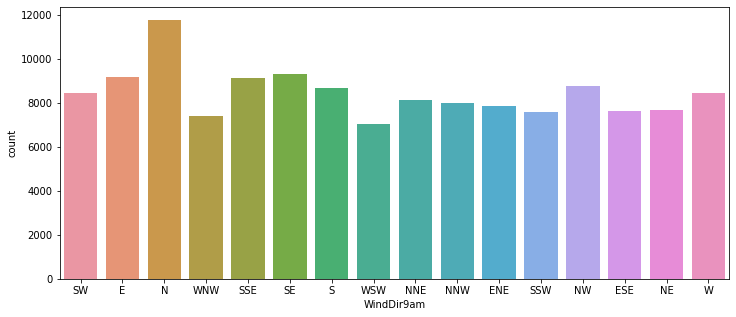

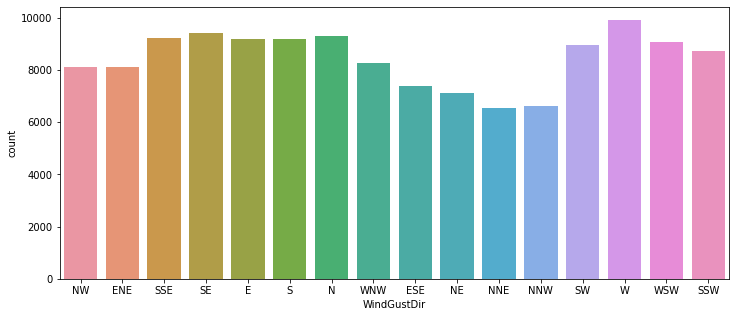

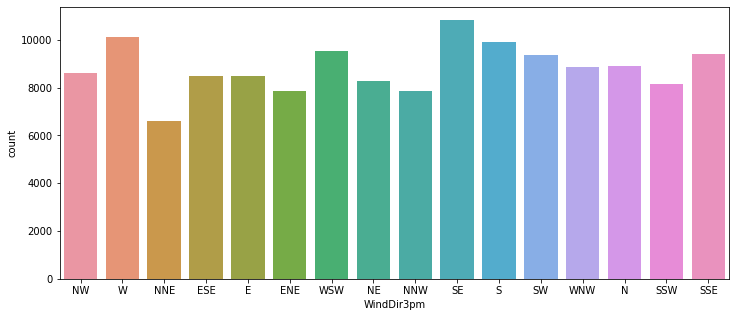

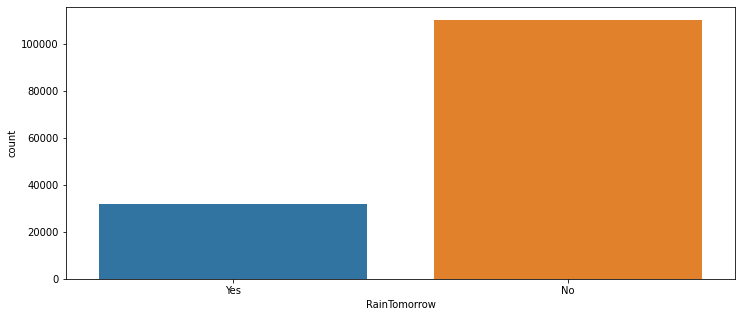

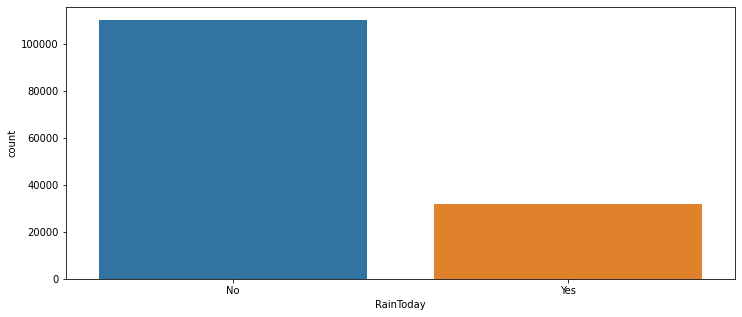

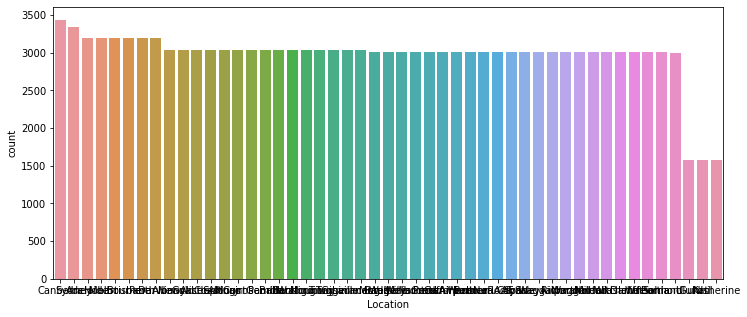

In [21]:
for i in tqdm(df[cat]):
  ax = plt.subplots(figsize=(12, 5))
  ax = sns.countplot(x=i, data=df[cat])

In [22]:
# from this above visulization in location it can not see anythings. so go on in simple way

df['Location'].value_counts(normalize=True,ascending=False)

Canberra            0.023622
Sydney              0.022989
Adelaide            0.021951
Hobart              0.021951
Melbourne           0.021951
Brisbane            0.021951
Perth               0.021951
Darwin              0.021951
MountGambier        0.020899
Wollongong          0.020899
Bendigo             0.020899
Ballarat            0.020899
Launceston          0.020899
GoldCoast           0.020899
Cairns              0.020899
Albury              0.020899
AliceSprings        0.020899
Townsville          0.020899
Albany              0.020899
MountGinini         0.020899
Tuggeranong         0.020892
Newcastle           0.020892
Penrith             0.020892
Watsonia            0.020686
Cobar               0.020686
Witchcliffe         0.020686
NorfolkIsland       0.020686
Mildura             0.020686
Portland            0.020686
Richmond            0.020686
WaggaWagga          0.020686
SydneyAirport       0.020686
Sale                0.020686
Nuriootpa           0.020686
PearceRAAF    

## Handle missing values

In [23]:
# Handle missing data : fill mode in categorical variable and fill mean in numerical variable

print(df.isnull().sum().sort_values(ascending=False))

#then split dataframe to categorical dataframe and numberical dataframe

num = [var for var in df.columns if df[var].dtype !='object']

print('Categorical variable :',cat)
print('Numercvial variable :',num)

Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64
Categorical variable : ['WindDir9am', 'WindGustDir', 'WindDir3pm', 'RainTomorrow', 'RainToday', 'Location']
Numercvial variable : ['Cloud3pm', 'Cloud9am', 'Pressure9am', 'Pressure3pm', 'WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Rainfall', 'WindSpeed3pm', 'Humidity9am', 'Temp9am', 'WindSpeed9am', 'MinTemp', 'MaxTemp', 'Date']


In [24]:
df.head()

,Cloud3pm,Cloud9am,Pressure9am,Pressure3pm,WindDir9am,WindGustDir,WindGustSpeed,Humidity3pm,WindDir3pm,Temp3pm,RainTomorrow,Rainfall,RainToday,WindSpeed3pm,Humidity9am,Temp9am,WindSpeed9am,MinTemp,MaxTemp,Location,Date
45587,7.0,7.0,1019.7,1015.0,SW,NW,30.0,29.0,NW,23.6,Yes,0.0,No,20.0,68.0,14.4,6.0,8.0,24.3,Canberra,2007-11-01
45588,3.0,5.0,1012.4,1008.4,E,ENE,39.0,36.0,W,25.7,Yes,3.6,Yes,17.0,80.0,17.5,4.0,14.0,26.9,Canberra,2007-11-02
45589,7.0,8.0,1009.5,1007.2,N,NW,85.0,69.0,NNE,20.2,Yes,3.6,Yes,6.0,82.0,15.4,6.0,13.7,23.4,Canberra,2007-11-03
45590,7.0,2.0,1005.5,1007.0,WNW,NW,54.0,56.0,W,14.1,Yes,39.8,Yes,24.0,62.0,13.5,30.0,13.3,15.5,Canberra,2007-11-04
45591,7.0,7.0,1018.3,1018.5,SSE,SSE,50.0,49.0,ESE,15.4,No,2.8,Yes,28.0,68.0,11.1,20.0,7.6,16.1,Canberra,2007-11-05


In [25]:
#Create two Dataframe

df_cat = df[cat]
df_num = df[num]

In [26]:
display(df_cat.head())
display(df_num.head())

,WindDir9am,WindGustDir,WindDir3pm,RainTomorrow,RainToday,Location
45587,SW,NW,NW,Yes,No,Canberra
45588,E,ENE,W,Yes,Yes,Canberra
45589,N,NW,NNE,Yes,Yes,Canberra
45590,WNW,NW,W,Yes,Yes,Canberra
45591,SSE,SSE,ESE,No,Yes,Canberra


,Cloud3pm,Cloud9am,Pressure9am,Pressure3pm,WindGustSpeed,Humidity3pm,Temp3pm,Rainfall,WindSpeed3pm,Humidity9am,Temp9am,WindSpeed9am,MinTemp,MaxTemp,Date
45587,7.0,7.0,1019.7,1015.0,30.0,29.0,23.6,0.0,20.0,68.0,14.4,6.0,8.0,24.3,2007-11-01
45588,3.0,5.0,1012.4,1008.4,39.0,36.0,25.7,3.6,17.0,80.0,17.5,4.0,14.0,26.9,2007-11-02
45589,7.0,8.0,1009.5,1007.2,85.0,69.0,20.2,3.6,6.0,82.0,15.4,6.0,13.7,23.4,2007-11-03
45590,7.0,2.0,1005.5,1007.0,54.0,56.0,14.1,39.8,24.0,62.0,13.5,30.0,13.3,15.5,2007-11-04
45591,7.0,7.0,1018.3,1018.5,50.0,49.0,15.4,2.8,28.0,68.0,11.1,20.0,7.6,16.1,2007-11-05


In [27]:
df_cat.mode()

,WindDir9am,WindGustDir,WindDir3pm,RainTomorrow,RainToday,Location
0,N,W,SE,No,No,Canberra


In [28]:
df_cat.isnull().sum()

WindDir9am      10566
WindGustDir     10326
WindDir3pm       4228
RainTomorrow     3267
RainToday        3261
Location            0
dtype: int64

In [29]:
# filling missing data with mode in categorical variable

for i in df_cat.mode():
  df_cat[i].fillna(df_cat[i].mode()[0], inplace=True)

In [30]:
df_cat.isnull().sum()

WindDir9am      0
WindGustDir     0
WindDir3pm      0
RainTomorrow    0
RainToday       0
Location        0
dtype: int64

In [31]:
df_num.mean()

Cloud3pm            4.509930
Cloud9am            4.447461
Pressure9am      1017.649940
Pressure3pm      1015.255889
WindGustSpeed      40.035230
Humidity3pm        51.539116
Temp3pm            21.683390
Rainfall            2.360918
WindSpeed3pm       18.662657
Humidity9am        68.880831
Temp9am            16.990631
WindSpeed9am       14.043426
MinTemp            12.194034
MaxTemp            23.221348
dtype: float64

In [32]:
df_num.isnull().sum()

Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindGustSpeed    10263
Humidity3pm       4507
Temp3pm           3609
Rainfall          3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Date                 0
dtype: int64

In [33]:
# filling missing data with mean in numberical variable

df_num.fillna(df_num.mean(),inplace=True)

In [34]:
df_num.isnull().sum()

Cloud3pm         0
Cloud9am         0
Pressure9am      0
Pressure3pm      0
WindGustSpeed    0
Humidity3pm      0
Temp3pm          0
Rainfall         0
WindSpeed3pm     0
Humidity9am      0
Temp9am          0
WindSpeed9am     0
MinTemp          0
MaxTemp          0
Date             0
dtype: int64

## Label encoding

In [35]:
le = preprocessing.LabelEncoder()

In [36]:
#for l in df_cat.columns :
#  df_cat[l]=le.fit_transform(df_cat[l])

In [37]:
df_cat['RainTomorrow'] = le.fit_transform(df_cat['RainTomorrow'])

In [38]:
label = df_cat['RainTomorrow']

In [39]:
df_cat.drop(columns='RainTomorrow',inplace=True)

Label RainTomorrow : 0 = No, Y = Yes

In [40]:
label.value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [41]:
# pd.get_dummies(df_cat['WindDir9am'], prefix='WindDir9am',drop_first=False)

In [42]:
# assumption month ,year must be cat variables
df_cat['Month'] = df_num['Date'].dt.month
df_cat['Year'] = df_num['Date'].dt.year

In [43]:
df_num.drop(columns='Date',inplace=True)

In [44]:
df_num.columns

Index(['Cloud3pm', 'Cloud9am', 'Pressure9am', 'Pressure3pm', 'WindGustSpeed',
       'Humidity3pm', 'Temp3pm', 'Rainfall', 'WindSpeed3pm', 'Humidity9am',
       'Temp9am', 'WindSpeed9am', 'MinTemp', 'MaxTemp'],
      dtype='object')

## One-hot encoding

In [45]:
cat_oe_f = pd.DataFrame()

for cat in df_cat.columns:
  cat_oe =pd.get_dummies(df_cat[cat],prefix= cat,drop_first=False)
  cat_oe_f = pd.concat((cat_oe_f,cat_oe),axis=1)

In [46]:
cat_oe_f

,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017
45587,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
45588,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
45589,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
45590,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
45591,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
67199,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [47]:
# concat dataframe
df_bf_model = pd.concat((cat_oe_f,df_num),axis=1)

#check null again !
df_bf_model.isnull().sum()

WindDir9am_E      0
WindDir9am_ENE    0
WindDir9am_ESE    0
WindDir9am_N      0
WindDir9am_NE     0
                 ..
Humidity9am       0
Temp9am           0
WindSpeed9am      0
MinTemp           0
MaxTemp           0
Length: 136, dtype: int64

In [48]:
X = df_bf_model
y = label

In [49]:
print(X.shape,y.shape)

(145460, 136) (145460,)


In [50]:
y.value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [51]:
# # import library
# from imblearn.over_sampling import SMOTE

# smote = SMOTE()

# # fit predictor and target variable
# X, y = smote.fit_resample(X, y)

In [52]:
print(X.shape,y.shape)

(145460, 136) (145460,)


In [53]:
y.value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [54]:
X.columns

Index(['WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
       'WindDir9am_S', 'WindDir9am_SE',
       ...
       'WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Rainfall', 'WindSpeed3pm',
       'Humidity9am', 'Temp9am', 'WindSpeed9am', 'MinTemp', 'MaxTemp'],
      dtype='object', length=136)

#Models

## Split Data to train-test

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , shuffle = False)

## Scaling Data by min-max before put them to the models !

In [56]:
# Scaling feature variable by min-max scalinj

from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [57]:
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))

**Compare approach between sort rows by date or original **

In [58]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [59]:
y_train.value_counts()

0    90836
1    25532
Name: RainTomorrow, dtype: int64

## Find The best Algorithm 

1. Logistic 
2. Decision Tree
3. Random Forrest
4. XG-boost

all of above come with proba method

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [61]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [62]:
model_lgr = LogisticRegression(solver='liblinear',random_state=0,class_weight='balanced')
model_dct = DecisionTreeClassifier(random_state=0,class_weight='balanced')
model_rdf = RandomForestClassifier(random_state=0,class_weight='balanced')
model_xgb = XGBClassifier(random_state=0,class_weight='balanced')

list_model = [model_lgr,model_dct,model_rdf,model_xgb]

In [63]:
# Model_All_result = pd.DataFrame()
# desc_m = []
# acc_m = []
# pcs_m = []
# rec_m = [] 

# for m in tqdm(list_model):
#   m.fit(X_train_sc,y_train)
#   y_pred = m.predict(X_test_sc)
#   ac_score = accuracy_score(y_test,y_pred)
#   precision = precision_score(y_test,y_pred)
#   recall= recall_score(y_test,y_pred)
#   desc_m.append(m)
#   acc_m.append(ac_score)
#   pcs_m.append(precision)
#   rec_m.append(recall)
#   data_ac = {'Model':desc_m,'accuracy':acc_m,'precision':pcs_m,'recall':rec_m}
#   # print(ac_score)
#   # print(model,' has score: ',ac_score)
#   # print(data_ac)
#   Model_All_result = pd.DataFrame(data_ac)


# Model_All_result

In [64]:
# Model_All_result.sort_values('recall',ascending=False)
# Model_All_result.nlargest(2,columns='recall')
# Model_All_result

In [65]:
# ### Save models

# from joblib import Parallel, delayed
# import os

# # Save all models as a pickle in a file
# for m in list_model:
#   save_name = str(m)
#   joblib.dump(m, path + save_name +".pkl")

##Original - No applying method

In [66]:
model_lgr_og = LogisticRegression(solver='liblinear',random_state=0)
model_dct_og = DecisionTreeClassifier(random_state=0)
model_rdf_og = RandomForestClassifier(random_state=0)
model_xgb_og = XGBClassifier(random_state=0)

list_model_og = [model_lgr_og,model_dct_og,model_rdf_og,model_xgb_og]
Model_og_result = pd.DataFrame()
desc_og = []
acc_og = []
pcs_og = []
rec_og = [] 

for m in tqdm(list_model_og):
  m.fit(X_train_sc,y_train)
  y_pred = m.predict(X_test_sc)
  ac_score = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall= recall_score(y_test,y_pred)
  desc_og.append(m)
  acc_og.append(ac_score)
  pcs_og.append(precision)
  rec_og.append(recall)
  data_ac = {'Model':desc_og,'accuracy':acc_og,'precision':pcs_og,'recall':rec_og}
  # print(ac_score)
  # print(model,' has score: ',ac_score)
  # print(data_ac)
  Model_og_result = pd.DataFrame(data_ac)


Model_og_result.sort_values(by='recall',ascending=False)

100%|██████████| 4/4 [01:18<00:00, 19.67s/it]


,Model,accuracy,precision,recall
0,"LogisticRegression(random_state=0, solver='lib...",0.842156,0.674289,0.534437
1,DecisionTreeClassifier(random_state=0),0.765674,0.465837,0.507171
2,"(DecisionTreeClassifier(max_features='auto', r...",0.845318,0.723420,0.470764
3,XGBClassifier(),0.843222,0.724685,0.453428


## Class Weight

In [67]:
import joblib

In [68]:
# Load the model from the file
model_log_from_joblib = joblib.load(path+"LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear').pkl")
model_dct_from_joblib = joblib.load(path+"DecisionTreeClassifier(class_weight='balanced', random_state=0).pkl")
model_rdf_from_joblib = joblib.load(path+"RandomForestClassifier(class_weight='balanced', random_state=0).pkl")
model_xgb_from_joblib = joblib.load(path+"XGBClassifier(class_weight='balanced').pkl")

In [69]:
loaded_model = [model_log_from_joblib,model_rdf_from_joblib,model_xgb_from_joblib,model_dct_from_joblib]

In [70]:
Model_class_we = pd.DataFrame()
desc_we = []
acc_we = []
pcs_we = []
rec_we = [] 

for m in tqdm(loaded_model):
  y_pred = m.predict(X_test_sc)
  ac_score = accuracy_score(y_test,y_pred)
  desc_we.append(m)
  acc_we.append(ac_score)
  precision = precision_score(y_test,y_pred)
  recall= recall_score(y_test,y_pred)
  pcs_we.append(precision)
  rec_we.append(recall)
  data_ac = {'Model':desc_we,'accuracy':acc_we,'precision':pcs_we,'recall':rec_we}
  # print(ac_score)
  # print(model,' has score: ',ac_score)
  # print(data_ac)
  Model_class_we = pd.DataFrame(data_ac)

Model_class_we.sort_values(by='recall',ascending=False,inplace=True)
Model_class_we

100%|██████████| 4/4 [00:01<00:00,  2.72it/s]


,Model,accuracy,precision,recall
0,"LogisticRegression(class_weight='balanced', ra...",0.777911,0.494114,0.767376
3,DecisionTreeClassifier(class_weight='balanced'...,0.774818,0.483225,0.467612
2,"XGBClassifier(class_weight='balanced', missing...",0.843222,0.724685,0.453428
1,"(DecisionTreeClassifier(max_features='auto', r...",0.844012,0.753436,0.423325


In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Reference : Confusion metrics 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

In [72]:
y_pred = model_rdf_from_joblib.predict(X_test_sc)
print(classification_report(y_test, y_pred,digits=5))

              precision    recall  f1-score   support

           0    0.85666   0.96136   0.90599     22747
           1    0.75344   0.42333   0.54208      6345

    accuracy                        0.84401     29092
   macro avg    0.80505   0.69234   0.72404     29092
weighted avg    0.83415   0.84401   0.82662     29092



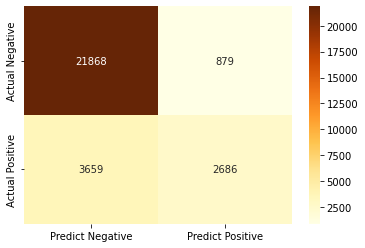

In [73]:
# visualize confusion matrix

confustion_matrix = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=confustion_matrix, columns=['Predict Negative', 'Predict Positive'], 
                                 index=['Actual Negative', 'Actual Positive'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlOrBr')
sns.set(rc={'figure.figsize':(11,7)})

In [74]:
y_pred = model_log_from_joblib.predict(X_test_sc)

confustion_matrix = confusion_matrix(y_test, y_pred)

print(model_log_from_joblib,'\n')

print('Confusion matrix\n\n', confustion_matrix)

print('\nTrue Positives(TP) = ', confustion_matrix[0,0])

print('\nTrue Negatives(TN) = ', confustion_matrix[1,1])

print('\nFalse Positives(FP) = ', confustion_matrix[0,1])

print('\nFalse Negatives(FN) = ', confustion_matrix[1,0])

print(classification_report(y_test, y_pred,digits=5))

LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear') 

Confusion matrix

 [[17762  4985]
 [ 1476  4869]]

True Positives(TP) =  17762

True Negatives(TN) =  4869

False Positives(FP) =  4985

False Negatives(FN) =  1476
              precision    recall  f1-score   support

           0    0.92328   0.78085   0.84611     22747
           1    0.49411   0.76738   0.60115      6345

    accuracy                        0.77791     29092
   macro avg    0.70870   0.77411   0.72363     29092
weighted avg    0.82968   0.77791   0.79268     29092



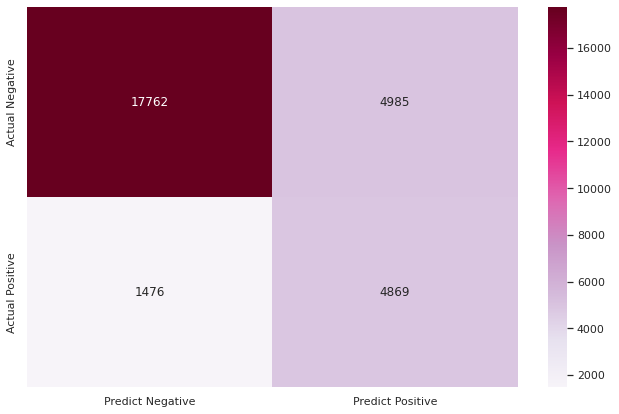

In [75]:
# visualize confusion matrix

cm_matrix = pd.DataFrame(data=confustion_matrix, columns=['Predict Negative', 'Predict Positive'], 
                                 index=['Actual Negative', 'Actual Positive'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='PuRd')
sns.set(rc={'figure.figsize':(11,7)})

In [76]:
# How to predict new data

y_pred_prob = model_rdf_from_joblib.predict_proba(X_test_sc)[0:10]

y_pred_prob

array([[0.85, 0.15],
       [0.89, 0.11],
       [0.91, 0.09],
       [0.84, 0.16],
       [0.71, 0.29],
       [0.82, 0.18],
       [0.53, 0.47],
       [0.82, 0.18],
       [0.75, 0.25],
       [0.85, 0.15]])

In [77]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

## SMOTE

Combine all predict result and vote the moted to finally output of prediction.

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
oversample = SMOTE(k_neighbors=3,random_state=42)
X_smote, y_smote = oversample.fit_resample(X_train_sc, y_train)

In [80]:
y_smote.value_counts()

1    90836
0    90836
Name: RainTomorrow, dtype: int64

In [81]:
y_train.shape

(116368,)

In [82]:
model_lgr_sm = LogisticRegression(solver='liblinear',random_state=0,class_weight='balanced')
model_dct_sm = DecisionTreeClassifier(random_state=0,class_weight='balanced')
model_rdf_sm = RandomForestClassifier(random_state=0,class_weight='balanced')
model_xgb_sm = XGBClassifier(random_state=0,class_weight='balanced')

list_model_sm = [model_lgr_sm,model_dct_sm,model_rdf_sm,model_xgb_sm]

In [83]:
Model_sm_result = pd.DataFrame()
desc_m = []
acc_m = []
pcs_m = []
rec_m = [] 

for m in tqdm(list_model_sm):
  m.fit(X_smote,y_smote)
  y_pred_sm = m.predict(X_test_sc)
  ac_score = accuracy_score(y_test,y_pred_sm)
  precision = precision_score(y_test,y_pred_sm)
  recall= recall_score(y_test,y_pred_sm)
  desc_m.append(m)
  acc_m.append(ac_score)
  pcs_m.append(precision)
  rec_m.append(recall)
  data_ac = {'Model':desc_m,'accuracy':acc_m,'precision':pcs_m,'recall':rec_m}
  # print(ac_score)
  # print(model,' has score: ',ac_score)
  # print(data_ac)
  Model_sm_result = pd.DataFrame(data_ac)


Model_sm_result.sort_values(by='recall',ascending=False)

100%|██████████| 4/4 [02:17<00:00, 34.28s/it]


,Model,accuracy,precision,recall
3,XGBClassifier(class_weight='balanced'),0.584112,0.331301,0.890465
1,DecisionTreeClassifier(class_weight='balanced'...,0.361783,0.226234,0.795902
0,"LogisticRegression(class_weight='balanced', ra...",0.781624,0.499585,0.759338
2,"(DecisionTreeClassifier(max_features='auto', r...",0.776502,0.491796,0.741686


In [84]:
model_xgb_smote = RandomForestClassifier(random_state=0,class_weight='balanced')
model_xgb_smote.fit(X_smote,y_smote)
y_pred_sm = model_xgb_smote.predict(X_test_sc)

In [85]:
print(classification_report(y_test,y_pred_sm,digits=5))

              precision    recall  f1-score   support

           0    0.91605   0.78621   0.84618     22747
           1    0.49180   0.74169   0.59143      6345

    accuracy                        0.77650     29092
   macro avg    0.70392   0.76395   0.71880     29092
weighted avg    0.82352   0.77650   0.79062     29092



In [86]:
CMtest = confusion_matrix(y_test, y_pred_sm)

TN = CMtest[0][0]
FN = CMtest[1][0]
TP = CMtest[1][1]
FP = CMtest[0][1]

In [87]:
confustion_matrix = confusion_matrix(y_test, y_pred_sm)

confustion_matrix

array([[17884,  4863],
       [ 1639,  4706]])

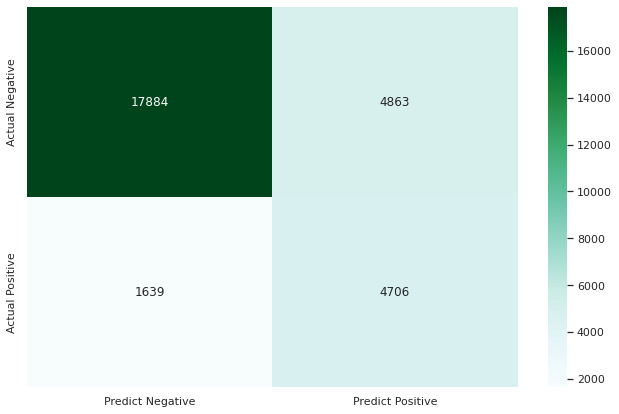

In [88]:
# visualize confusion matrix

cm_matrix = pd.DataFrame(data=confustion_matrix, columns=['Predict Negative', 'Predict Positive'], 
                                 index=['Actual Negative', 'Actual Positive'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='BuGn')
sns.set(rc={'figure.figsize':(11,7)})

In [89]:
model_lgr_smote = LogisticRegression(solver='liblinear',random_state=0,class_weight='balanced')

In [90]:
model_lgr_smote.fit(X_smote,y_smote)
y_pred_sm = model_lgr_smote.predict(X_test_sc)

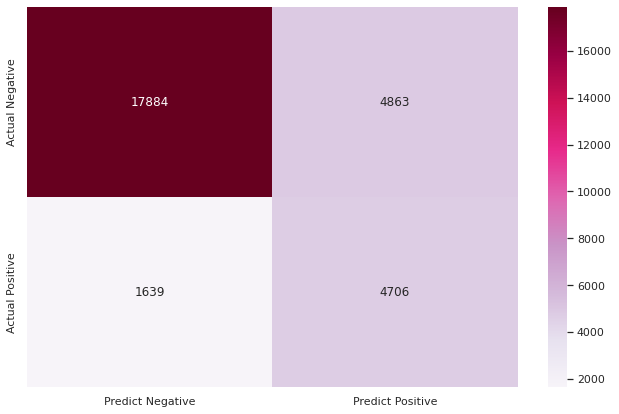

In [91]:
# visualize confusion matrix

cm_matrix = pd.DataFrame(data=confustion_matrix, columns=['Predict Negative', 'Predict Positive'], 
                                 index=['Actual Negative', 'Actual Positive'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='PuRd')
sns.set(rc={'figure.figsize':(11,7)})

In [92]:
confustion_matrix = confusion_matrix(y_test, y_pred_sm)

confustion_matrix

array([[17921,  4826],
       [ 1527,  4818]])

In [93]:
print(classification_report(y_test,y_pred_sm,digits=5))

              precision    recall  f1-score   support

           0    0.92148   0.78784   0.84944     22747
           1    0.49959   0.75934   0.60266      6345

    accuracy                        0.78162     29092
   macro avg    0.71053   0.77359   0.72605     29092
weighted avg    0.82947   0.78162   0.79562     29092



# Conclusion

In [94]:
# Append Model dataframe
Model_og_result['Method'] = 'Orignal Data'
Model_class_we['Method'] = 'Class Weight'
Model_sm_result['Method'] = 'SMOTE'
all_result = Model_og_result.append(Model_class_we.append(Model_sm_result))
all_result.sort_values(by='recall',ascending=False,inplace=True)
all_result.reset_index(inplace=True,drop=True)

# show result
all_result

,Model,accuracy,precision,recall,Method
0,XGBClassifier(class_weight='balanced'),0.584112,0.331301,0.890465,SMOTE
1,DecisionTreeClassifier(class_weight='balanced'...,0.361783,0.226234,0.795902,SMOTE
2,"LogisticRegression(class_weight='balanced', ra...",0.777911,0.494114,0.767376,Class Weight
3,"LogisticRegression(class_weight='balanced', ra...",0.781624,0.499585,0.759338,SMOTE
4,"(DecisionTreeClassifier(max_features='auto', r...",0.776502,0.491796,0.741686,SMOTE
5,"LogisticRegression(random_state=0, solver='lib...",0.842156,0.674289,0.534437,Orignal Data
6,DecisionTreeClassifier(random_state=0),0.765674,0.465837,0.507171,Orignal Data
7,"(DecisionTreeClassifier(max_features='auto', r...",0.845318,0.723420,0.470764,Orignal Data
8,DecisionTreeClassifier(class_weight='balanced'...,0.774818,0.483225,0.467612,Class Weight
9,XGBClassifier(),0.843222,0.724685,0.453428,Orignal Data


##Summary
My opinon
if you focus on predict class positive(RainTomorrow:Yes) you should select model with high recall first then select high accuracy for me I select Logistic Regression model on Class Weight Method

## Future Work



1.   Tune Parameter by grid seach cv
2.   Outcome voted by the predictive output of many algorithms.
3.   Feature engineering in time series such as seasonal index.
